<a href="https://colab.research.google.com/github/judithlambersend/Machine_Learning_TP2/blob/main/Machine_Learning_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Machine Learning TP2
# Romain Broet, Joseph Coste, Judith Lambersend
# Classe 2B

In [ ]:
## QUESTION 1

In [ ]:
uploaded = files.upload()
heart_data = pd.read_csv('heart.csv',delimiter=',')

Saving heart.csv to heart (3).csv


In [ ]:
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# check the shape
print("Shape\n",heart_data.shape)

Shape
 (303, 1)


In [ ]:
#print(heart_data.info())

In [ ]:
# check for null values 
null_values = heart_data.isnull().sum()
print(null_values)

# drop the rows with missing values
heart_data.dropna(inplace=True)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


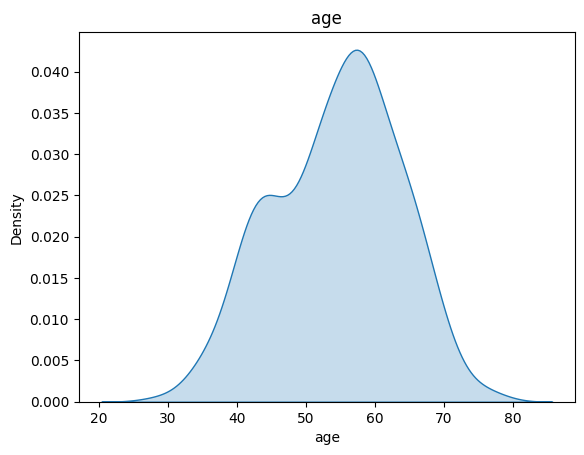

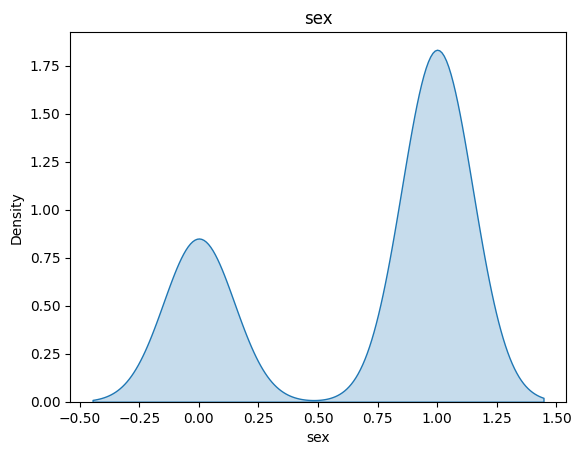

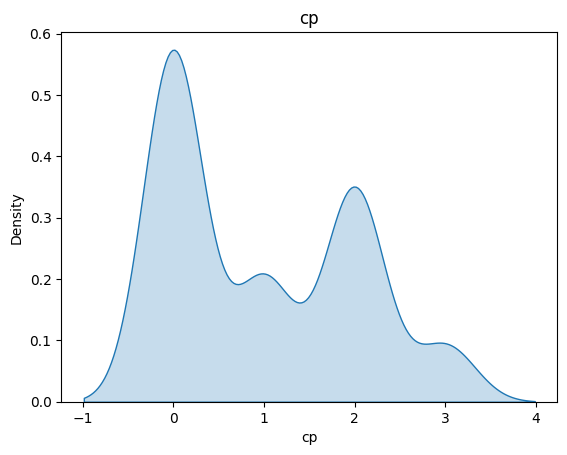

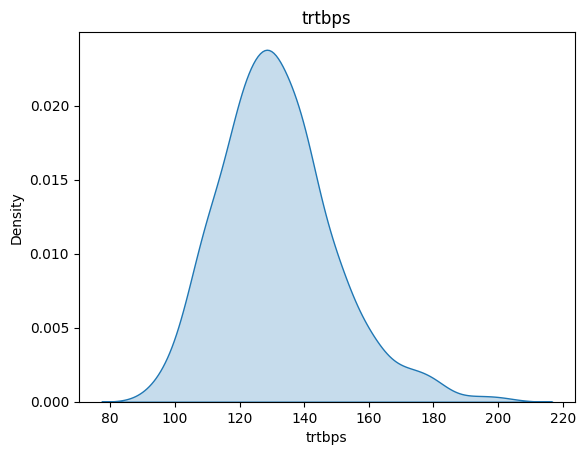

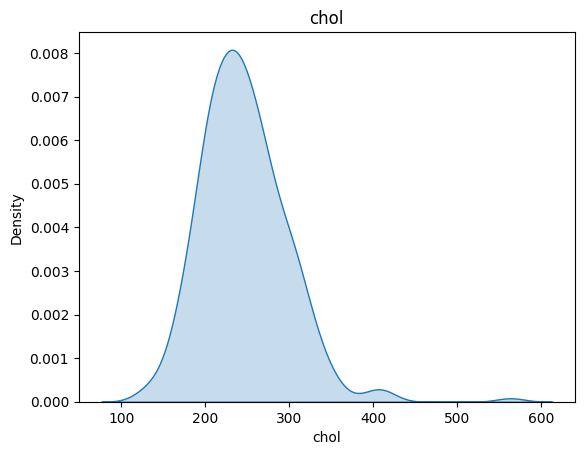

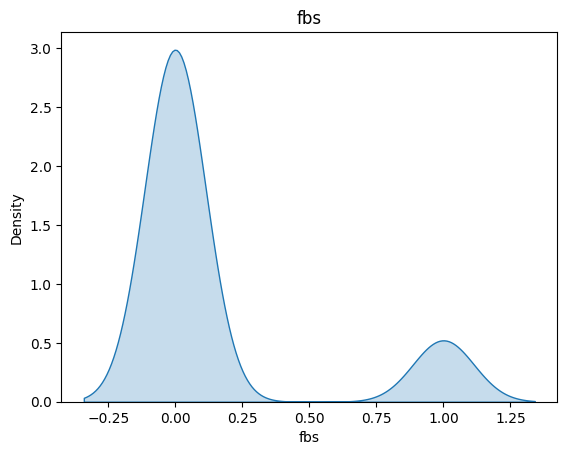

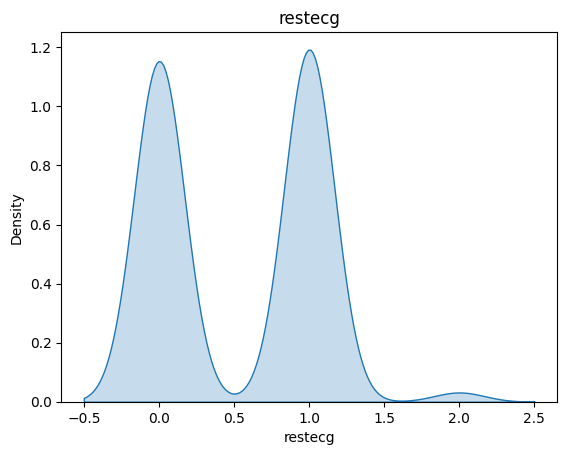

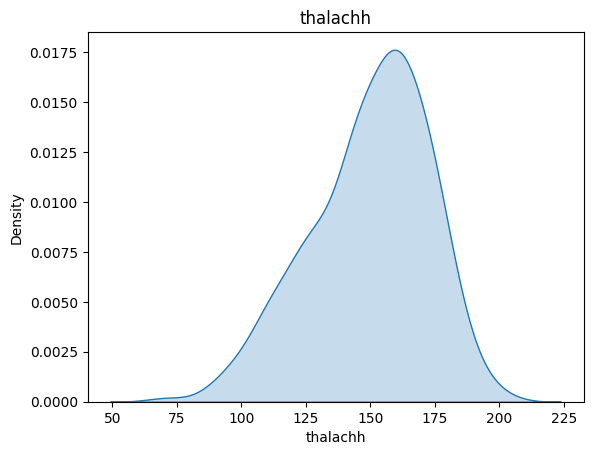

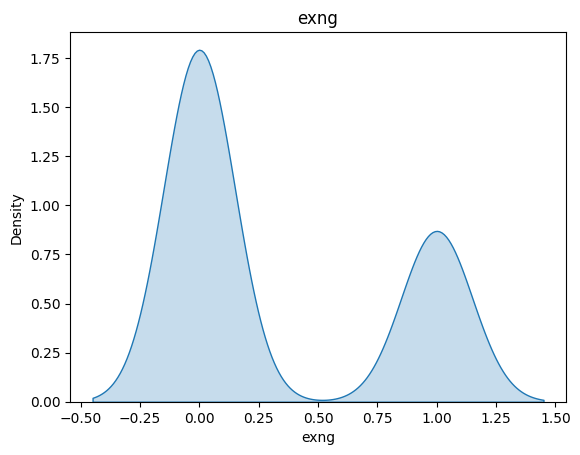

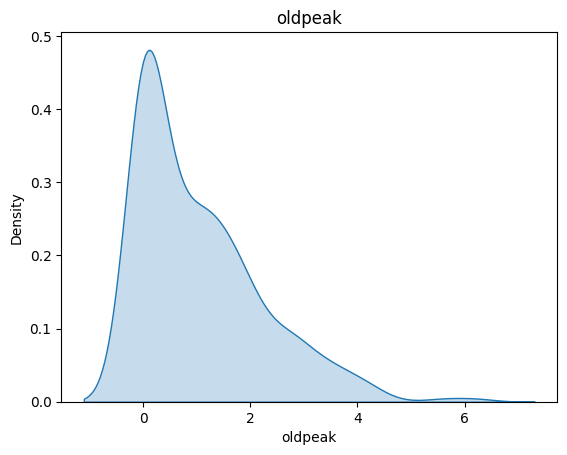

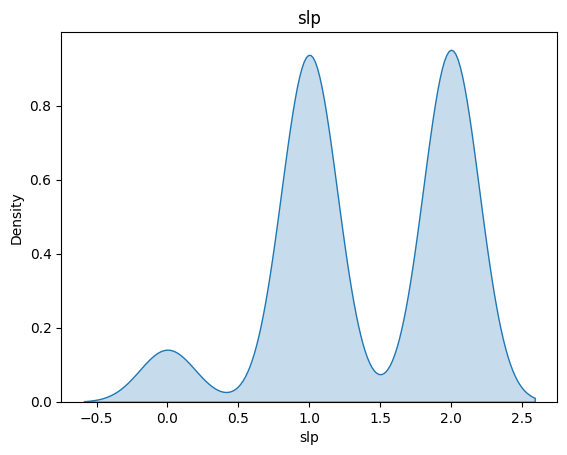

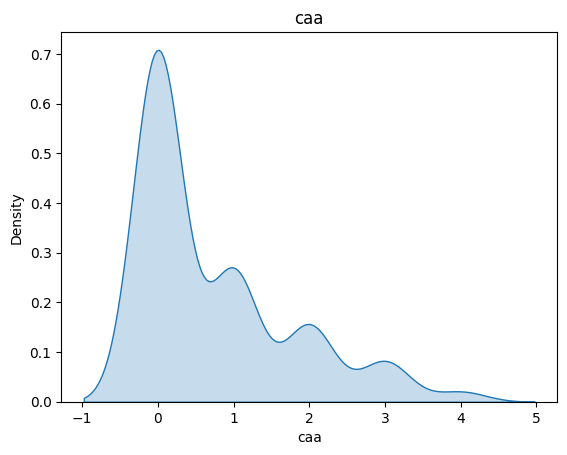

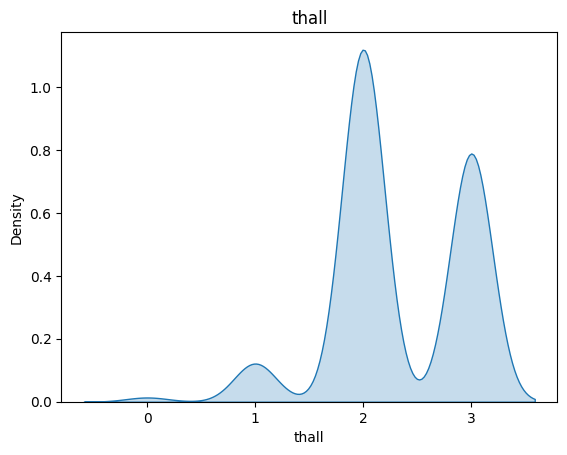

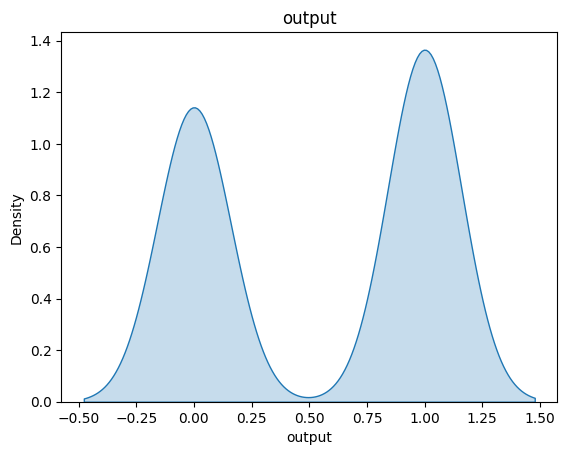

In [ ]:

# Visualize the distribution of each feature with density plots

for feature in heart_data.columns:
    sns.kdeplot(heart_data[feature], fill=True)
    plt.title(feature)
    plt.show()

In [ ]:
# Split training and testing 

X = heart_data.drop('output', axis=1)
y = heart_data['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

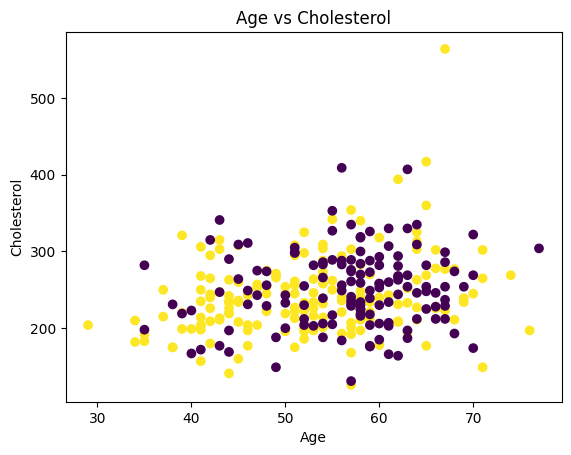

In [ ]:
# Plot the heart data on a scatter plot
colors = {0:'red', 1:'blue'}
plt.scatter(heart_data['age'], heart_data['chol'], c=[heart_data['output']])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol')
plt.show()

In [ ]:
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7049180327868853
Precision: 0.6666666666666666
Confusion Matrix:
 [[15 14]
 [ 4 28]]


In [ ]:
## QUESTION 2

In [ ]:
print("Ici on test avec C=10 et Kernel = poly\n")
svm1 = SVC(C=10, kernel='poly')
svm1.fit(X_train, y_train)

y_pred = svm1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Ici on test avec C=10 et Kernel = poly

Accuracy: 0.819672131147541
Precision: 0.8387096774193549
Confusion Matrix:
 [[24  5]
 [ 6 26]]


In [ ]:
print("Ici on test avec C=100 et Kernel = poly\n")
svm2 = SVC(C=100, kernel='poly')
svm2.fit(X_train, y_train)

y_pred = svm2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Ici on test avec C=100 et Kernel = poly

Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Confusion Matrix:
 [[24  5]
 [ 4 28]]


In [ ]:
print("Ici on test avec C=1000 et Kernel = poly\n")
svm3 = SVC(C=1000, kernel='poly')
svm3.fit(X_train, y_train)

y_pred = svm3.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Ici on test avec C=1000 et Kernel = poly

Accuracy: 0.8688524590163934
Precision: 0.875
Confusion Matrix:
 [[25  4]
 [ 4 28]]


In [ ]:
print("Ici on test avec C=10 et Kernel = linear\n")
svm4 = SVC(C=10, kernel='linear')
svm4.fit(X_train, y_train)

y_pred = svm4.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Ici on test avec C=10 et Kernel = linear

Accuracy: 0.8524590163934426
Precision: 0.896551724137931
Confusion Matrix:
 [[26  3]
 [ 6 26]]


In [ ]:
## QUESTION 3

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print("meilleurs paramètres: ", grid_search.best_params_)
print("meilleur score: ", grid_search.best_score_)

meilleurs paramètres:  {'C': 100, 'kernel': 'linear'}
meilleur score:  0.8179421768707483


In [ ]:
## QUESTION 4

In [ ]:
svm_random = RandomizedSearchCV(estimator=svm, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
svm_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42)

In [ ]:
print("meilleurs paramètres: ", svm_random.best_params_)
print("meilleur score: ", svm_random.best_score_)

meilleurs paramètres:  {'kernel': 'linear', 'C': 10}
meilleur score:  0.8137755102040816


In [ ]:
## QUESTION 5

In [ ]:
models_with_parameters = {
    svm : {'C': [0.1, 1, 100, 1000], 'kernel': ['linear', 'rbf', 'poly']},
    KNeighborsClassifier(): {'n_neighbors': [3, 5, 7],'weights': ['uniform', 'distance']}
}

In [ ]:
for model, parameters in models_with_parameters.items():
    grid = GridSearchCV(model, parameters, cv=5)
    grid.fit(X, y)
    print(f"Best parameters for {type(model).__name__}: {grid.best_params_}")

Best parameters for SVC: {'C': 100, 'kernel': 'linear'}
Best parameters for KNeighborsClassifier: {'n_neighbors': 7, 'weights': 'distance'}
